In [1]:
import pymrio as mr
import pandas as pd

# import numpy as np
# import scipy as sp
import pickle

# import os
# from pypardiso import spsolve
# from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import country_converter as coco

%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

Nomenclature in pymrio

See https://pymrio.readthedocs.io/en/latest/terminology.html

# Load data

In [ ]:
with open("exiobase/exiobase369_ixi_2022.pkl", "rb") as f:
    exiobase_2022 = pickle.load(f)

# Or point mr.parse_exiobase to the folder where you downloaded the zip file
# exiobase_2022 = mr.parse_exiobase3(path="path/to/IOT_ixi_2022.zip")

# Health footprints

In [4]:
Z_health = exiobase_2022.Z.xs("Health and social work (85)", level="sector", axis=1)

In [5]:
Z_health.head()

region                                                   AT        BE  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    5.571206e-09  0.043994   
       Cultivation of cereal grains nec        3.078799e+00  0.026799   
       Cultivation of vegetables, fruit, nuts  4.988217e-01  0.003764   
       Cultivation of oil seeds                7.277047e-01  0.053050   

region                                               BG            CY  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000  0.000000e+00   
       Cultivation of wheat                    0.000851  1.425469e-02   
       Cultivation of cereal grains nec        0.010117  2.846937e-08   
       Cultivation of vegetables, fruit, nuts  0.032482  5.593980e-04   
       Cultivation of oil seeds                0.001111  0.000000e+00   

region                                               CZ        DE        DK  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.008981  1.924457  0.000294   
       Cultivation of cereal grains nec        0.121311  5.216115  0.006244   
       Cultivation of vegetables, fruit, nuts  0.061925  1.167078  0.014997   
       Cultivation of oil seeds                0.045888  2.197430  0.007861   

region                                                   EE        ES  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    1.443966e-05  0.001075   
       Cultivation of cereal grains nec        6.354652e-04  0.005817   
       Cultivation of vegetables, fruit, nuts  2.343606e-04  0.000839   
       Cultivation of oil seeds                1.626602e-09  0.002009   

region                                                   FI  ...  \
region sector                                                ...   
AT     Cultivation of paddy rice               0.000000e+00  ...   
       Cultivation of wheat                    4.799722e-09  ...   
       Cultivation of cereal grains nec        8.205922e-09  ...   
       Cultivation of vegetables, fruit, nuts  2.849431e-02  ...   
       Cultivation of oil seeds                5.101509e-03  ...   

region                                                   TR            TW  \
region sector                                                               
AT     Cultivation of paddy rice               0.000000e+00  0.000000e+00   
       Cultivation of wheat                    1.559393e-09  5.885895e-10   
       Cultivation of cereal grains nec        2.559003e-08  8.583763e-10   
       Cultivation of vegetables, fruit, nuts  2.214186e-04  3.596217e-07   
       Cultivation of oil seeds                4.705839e-05  3.991090e-08   

region                                                   NO            ID  \
region sector                                                               
AT     Cultivation of paddy rice               0.000000e+00  0.000000e+00   
       Cultivation of wheat                    5.888521e-09  6.345795e-11   
       Cultivation of cereal grains nec        1.006499e-08  9.849021e-11   
       Cultivation of vegetables, fruit, nuts  1.322422e-02  2.432731e-08   
       Cultivation of oil seeds                8.837353e-03  2.699851e-09   

region                                                   ZA        WA  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    1.628848e-08  0.008309   
       Cultivation of cereal grains nec        2.734167e-08  

In [6]:
# Isolate the health sectors in footprints
health_air_emissions = exiobase_2022.air_emissions.D_cba.xs(
    "Health and social work (85)", level="sector", axis=1
)

health_air_emissions_cap = exiobase_2022.air_emissions.D_cba.xs(
    "Health and social work (85)", level="sector", axis=1
).div(exiobase_2022.population.loc["population"], axis=1)

In [7]:
# GWP
gwp = pd.read_csv("exiobase/gwp.csv", encoding="utf-8", index_col=0)["GWP100"]
gwp

stressor
As - combustion - air         0.0
B(a)P - combustion - air      0.0
B(b)F - combustion - air      0.0
B(k)F - combustion - air      0.0
CH4 - combustion - air        0.0
                             ... 
CO2 - waste - fossil - air    1.0
NH3 - waste - air             0.0
NOX - waste - air             0.0
PM2.5 - waste - air           0.0
SOx - waste - air             0.0
Name: GWP100, Length: 418, dtype: float64

In [8]:
health_ghg_cap = gwp @ health_air_emissions_cap

<Axes: ylabel='region'>

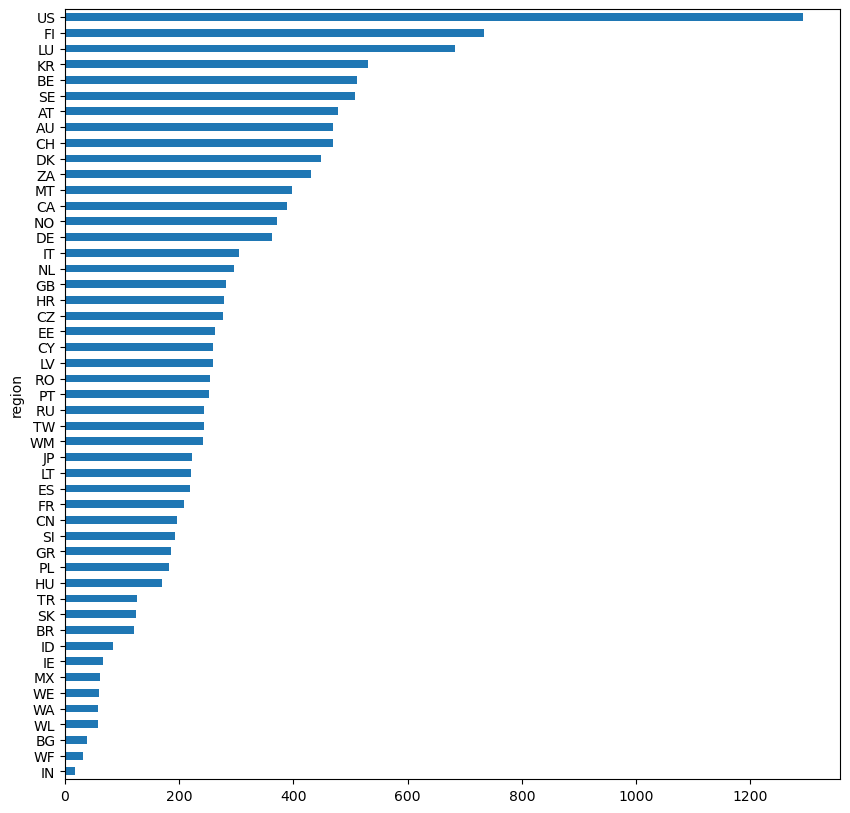

In [9]:
sns.set_style()

fig, ax = plt.subplots(figsize=(10, 10))
health_ghg_cap.sort_values().plot.barh(ax=ax)

In [10]:
# Create a GHG intensity vector
S_GHG = gwp @ exiobase_2022.air_emissions.S

In [11]:
# Since L is square, I never know which axis actually gets multiplied
# Clarifying by making it non-square
exiobase_2022.L.head().mul(S_GHG.head(), axis=0)

region                                                               AT  \
sector                                        Cultivation of paddy rice   
region sector                                                             
AT     Cultivation of paddy rice                                    0.0   
       Cultivation of wheat                                         0.0   
       Cultivation of cereal grains nec                             0.0   
       Cultivation of vegetables, fruit, nuts                       0.0   
       Cultivation of oil seeds                                     0.0   

region                                                              \
sector                                        Cultivation of wheat   
region sector                                                        
AT     Cultivation of paddy rice                      0.000000e+00   
       Cultivation of wheat                           1.235233e+06   
       Cultivation of cereal grains nec               9.012454e+01   
       Cultivation of vegetables, fruit, nuts         2.756086e+01   
       Cultivation of oil seeds                       2.257645e+01   

region                                                                          \
sector                                        Cultivation of cereal grains nec   
region sector                                                                    
AT     Cultivation of paddy rice                                  0.000000e+00   
       Cultivation of wheat                                       6.547561e+01   
       Cultivation of cereal grains nec                           1.138609e+06   
       Cultivation of vegetables, fruit, nuts                     2.796696e+01   
       Cultivation of oil seeds                                   2.200208e+01   

region                                                                                \
sector                                        Cultivation of vegetables, fruit, nuts   
region sector                                                                          
AT     Cultivation of paddy rice                                            0.000000   
       Cultivation of wheat                                                25.744222   
       Cultivation of cereal grains nec                                    57.869407   
       Cultivation of vegetables, fruit, nuts                          249175.454148   
       Cultivation of oil seeds                                            24.146055   

region                                                                  \
sector                                        Cultivation of oil seeds   
region sector                                                            
AT     Cultivation of paddy rice                              0.000000   
       Cultivation of wheat                                  44.098804   
       Cultivation of cereal grains nec                      78.052150   
       Cultivation of vegetables, fruit, nuts                22.468696   
       Cultivation of oil seeds                          733712.767881   

region                                                                               \
sector                                        Cultivation of sugar cane, sugar beet   
region sector                                                                         
AT     Cultivation of paddy rice                                           0.000000   
       Cultivation of wheat                                               67.824784   
       Cultivation of cereal grains nec                                  122.182004   
       Cultivation of vegetables, fruit, nuts                             29.334997   
       Cultivation of oil seeds                                           26.021184   

region                                                                           \
sector                                        Cultivation of plant-based fibers   
region sector       

In [12]:
# This provides the breakdown of GHG per sector of production, per sector and country of demand
demand_ghg = (
    (exiobase_2022.L.mul(S_GHG, axis=0) @ exiobase_2022.Y)
    .groupby("region", axis=1)
    .sum()
)

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\2146022997.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby("region", axis=1)


In [13]:
# We can also create the demand vector for the health sector only
health_demand = (
    exiobase_2022.Y.xs("Health and social work (85)", level="sector", drop_level=False)
    .groupby("region", axis=1)
    .sum()
)
health_demand.head()

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\1315547062.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby("region", axis=1)


,region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SK,TR,TW,US,WA,WE,WF,WL,WM,ZA
region,sector,,,,,,,,,,,,,,,,,,,,,
AT,Health and social work (85),30496.843718,3.453375,8.466314,0.085958,8.120176,2.797050,7.942336,11.478341,1.777934e+00,6.827689,...,4.795979,0.892489,29.133585,10.120164,1.591107,13.985675,8.809790,10.717723,15.274407,4.748591
BE,Health and social work (85),5.532638,2.371273,41058.881773,0.074617,5.419052,1.968162,3.869566,6.004435,1.197969e+00,4.400448,...,4.230228,0.697292,16.389868,200.531754,5.987091,8.861721,148.486280,48.342918,80.547933,3.348813
BG,Health and social work (85),0.309218,0.107087,0.267589,209.067797,0.223201,0.080108,0.206934,0.257236,2.252410e-02,0.173026,...,0.183958,0.206916,0.717341,0.308274,0.475513,0.516749,0.202734,0.322991,1.198641,0.129053
CY,Health and social work (85),1.262310,0.688969,1.295643,0.006033,1.406873,0.544467,1.038840,1.831524,8.536837e+02,1.178862,...,0.905007,0.167534,4.941146,1.545608,0.218515,1.447706,1.361397,1.942664,2.077771,0.940601
CZ,Health and social work (85),5.559870,1.157793,3.437048,0.030691,4.009636,1.535084,2.084586,4.296792,3.490437e-07,11624.495720,...,3.017141,0.474129,15.048087,4.587474,0.755372,3.132351,3.151814,4.604706,7.026753,1.280319


In [14]:
# And calculate the footprint per country-sector of production
health_ghg_disag = (
    exiobase_2022.L.mul(S_GHG, axis=0)[health_demand.index] @ health_demand
)

In [15]:
# And do the same per capita
health_ghg_disag_cap = health_ghg_disag.div(
    exiobase_2022.population.loc["population"], axis=1
)
health_ghg_disag_cap.head()

AT        AU        BE  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.058996  0.002889  0.013007   
       Cultivation of cereal grains nec        0.500471  0.005724  0.026484   
       Cultivation of vegetables, fruit, nuts  0.149491  0.001439  0.011162   
       Cultivation of oil seeds                0.076357  0.001038  0.011342   

                                                     BG        BR        CA  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.000271  0.000137  0.001443   
       Cultivation of cereal grains nec        0.001475  0.000277  0.002999   
       Cultivation of vegetables, fruit, nuts  0.000908  0.000144  0.000835   
       Cultivation of oil seeds                0.000245  0.000052  0.000525   

                                                     CH        CN        CY  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.025474  0.000179  0.021551   
       Cultivation of cereal grains nec        0.024817  0.000505  0.002147   
       Cultivation of vegetables, fruit, nuts  0.011150  0.000136  0.001743   
       Cultivation of oil seeds                0.008554  0.000233  0.000444   

                                                     CZ  ...        SK  \
region sector                                            ...             
AT     Cultivation of paddy rice               0.000000  ...  0.000000   
       Cultivation of wheat                    0.003729  ...  0.004552   
       Cultivation of cereal grains nec        0.023698  ...  0.013576   
       Cultivation of vegetables, fruit, nuts  0.009878  ...  0.006673   
       Cultivation of oil seeds                0.008948  ...  0.002375   

                                                     TR        TW        US  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.000331  0.000525  0.002739   
       Cultivation of cereal grains nec        0.000846  0.001453  0.006585   
       Cultivation of vegetables, fruit, nuts  0.000397  0.000466  0.002454   
       Cultivation of oil seeds                0.000328  0.000326  0.001464   

                                                     WA        WE        WF  \
region sector                                                                 
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000   
       Cultivation of wheat                    0.000124  0.001151  0.000068   
       Cultivation of cereal grains nec        0.000430  0.006286  0.000179   
       Cultivation of vegetables, fruit, nuts  0.000097  0.001002  0.000089   
       Cultivation of oil seeds                0.000118  0.003091  0.000047   

                                                     WL        WM        ZA  
region sector                                                                
AT     Cultivation of paddy rice               0.000000  0.000000  0.000000  
       Cultivation of wheat                    0.000115  0.001283  0.000415  
       Cultivation of cereal grains nec        0.000332  0.004062  0.001067  
       Cultivation of vegetables, fruit, nuts  0.000104  0.001593  0.000750  
       Cultivation of oil seeds                0.000063  0.000769  0.000237  

[5 rows x 49 columns]

In [16]:
# We can split the footprint in domestic/imports
health_ghg_disag_imports = mr.tools.ioutil.set_dom_block(health_ghg_disag)
health_ghg_disag_dom = health_ghg_disag - health_ghg_disag_imports

In [17]:
# Aggregating in two regions for each (domestic, imports)
health_ghg_dom_imp = pd.concat(
    [health_ghg_disag_dom.sum(), health_ghg_disag_imports.sum()],
    axis=1,
    keys=["domestic", "imports"],
)

In [18]:
# Same, per capita
health_ghg_dom_imp_cap = health_ghg_dom_imp.div(
    exiobase_2022.population.loc["population"], axis=0
)

Text(0.5, 1.0, 'GHG footprint of healthcare demand, in kg CO2 eq./person, 2022')

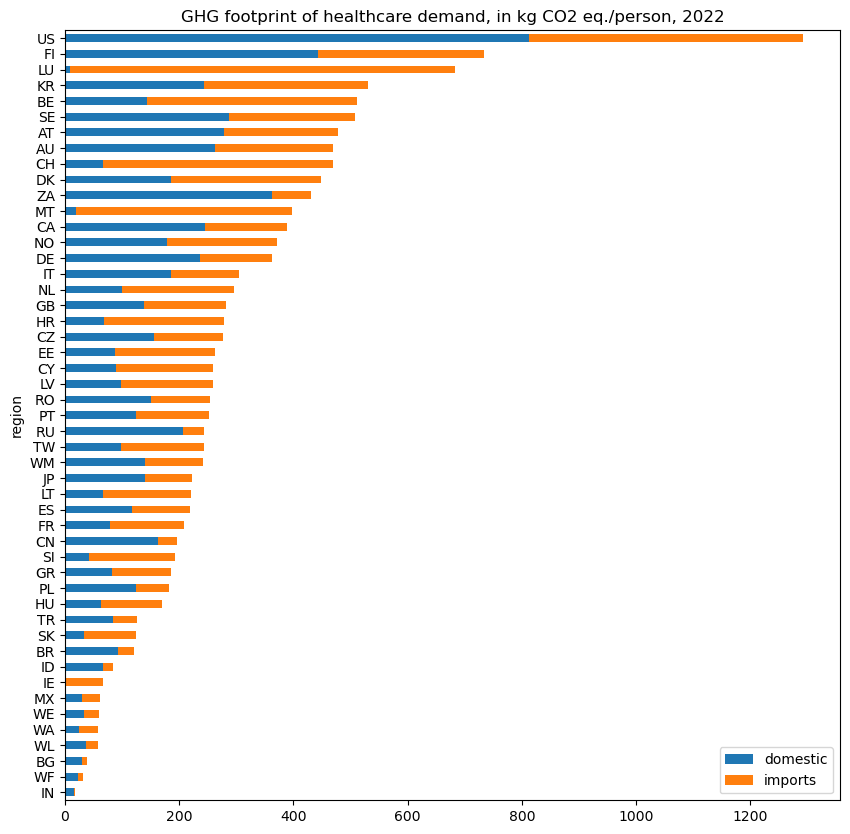

In [19]:
# Plot the results, ordered decreasingly
ax = health_ghg_dom_imp_cap.loc[health_ghg_cap.sort_values().index].plot.barh(
    stacked=True, figsize=(10, 10)
)
ax.set_title("GHG footprint of healthcare demand, in kg CO2 eq./person, 2022")

In [20]:
# It would be interesting to compare against expenses
health_expenses_cap = (
    health_demand.sum().div(exiobase_2022.population.loc["population"]) * 1e6
)

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\1601531704.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))


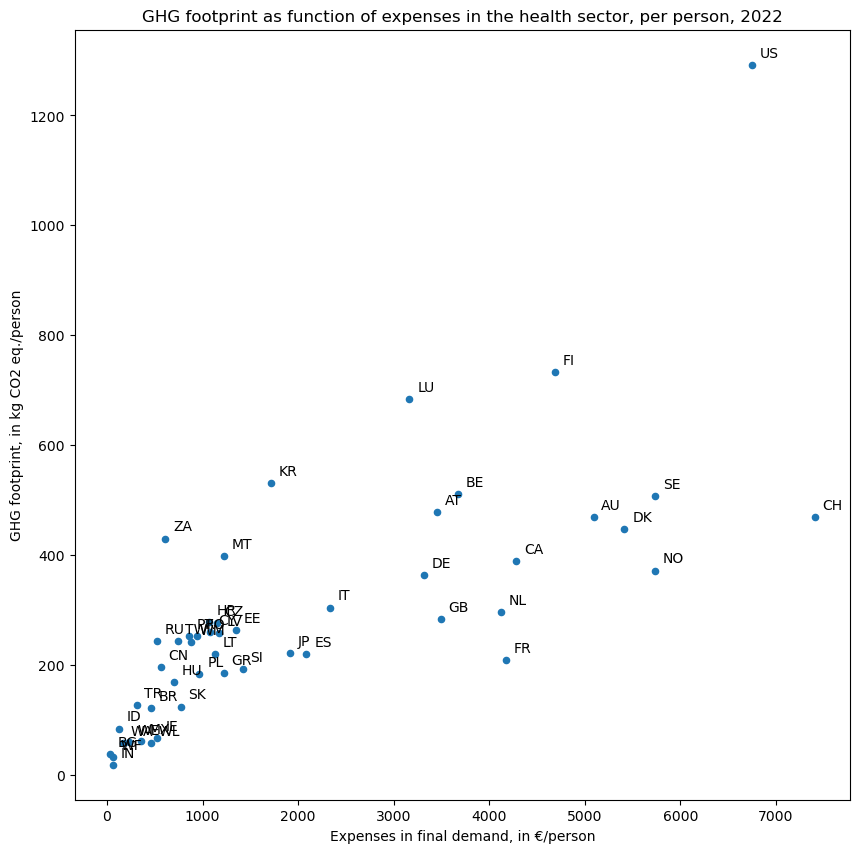

In [21]:
# Scatter plot, footprint vs. expenses
sns.set_style()

GHG_EUR = pd.concat(
    [health_expenses_cap, health_ghg_cap],
    keys=["Expenses (€)", "GHG footprint (kg CO2 eq.)"],
    axis=1,
)

fig, ax = plt.subplots(figsize=(10, 10))
GHG_EUR.plot.scatter(x="Expenses (€)", y="GHG footprint (kg CO2 eq.)", ax=ax)
ax.set_title(
    "GHG footprint as function of expenses in the health sector, per person, 2022"
)
ax.set_ylabel("GHG footprint, in kg CO2 eq./person")
ax.set_xlabel("Expenses in final demand, in €/person")

ylim = ax.get_ylim()
offset_y = (ylim[1] - ylim[0]) / 100
xlim = ax.get_xlim()
offset_x = (xlim[1] - xlim[0]) / 100

for row in GHG_EUR.iterrows():
    ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))

## Other indicators

In [22]:
list(exiobase_2022.get_extensions())

['nutrients',
 'factor_inputs',
 'employment',
 'water',
 'air_emissions',
 'material']

In [23]:
indicator = "Domestic Extraction Used - Metal Ores - Copper ores"
scale = 1e6  # kt to kg in this case

S_ind = exiobase_2022.material.S.loc[indicator]

In [24]:
# Calculate the footprint for indicator "ind" per country-sector of production
health_ind_disag = (
    exiobase_2022.L.mul(S_ind, axis=0)[health_demand.index] @ health_demand
)

# And do the same per capita
health_ind_disag_cap = health_ind_disag.div(
    exiobase_2022.population.loc["population"], axis=1
)
health_ind_disag_cap.head()

AT   AU   BE   BG   BR   CA  \
region sector                                                                 
AT     Cultivation of paddy rice               0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of wheat                    0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of cereal grains nec        0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of vegetables, fruit, nuts  0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of oil seeds                0.0  0.0  0.0  0.0  0.0  0.0   

                                                CH   CN   CY   CZ  ...   SK  \
region sector                                                      ...        
AT     Cultivation of paddy rice               0.0  0.0  0.0  0.0  ...  0.0   
       Cultivation of wheat                    0.0  0.0  0.0  0.0  ...  0.0   
       Cultivation of cereal grains nec        0.0  0.0  0.0  0.0  ...  0.0   
       Cultivation of vegetables, fruit, nuts  0.0  0.0  0.0  0.0  ...  0.0   
       Cultivation of oil seeds                0.0  0.0  0.0  0.0  ...  0.0   

                                                TR   TW   US   WA   WE   WF  \
region sector                                                                 
AT     Cultivation of paddy rice               0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of wheat                    0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of cereal grains nec        0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of vegetables, fruit, nuts  0.0  0.0  0.0  0.0  0.0  0.0   
       Cultivation of oil seeds                0.0  0.0  0.0  0.0  0.0  0.0   

                                                WL   WM   ZA  
region sector                                                 
AT     Cultivation of paddy rice               0.0  0.0  0.0  
       Cultivation of wheat                    0.0  0.0  0.0  
       Cultivation of cereal grains nec        0.0  0.0  0.0  
       Cultivation of vegetables, fruit, nuts  0.0  0.0  0.0  
       Cultivation of oil seeds                0.0  0.0  0.0  

[5 rows x 49 columns]

In [25]:
health_ind_cap = (
    exiobase_2022.material.D_cba.xs(
        "Health and social work (85)", level="sector", axis=1
    )
    .div(exiobase_2022.population.loc["population"], axis=1)
    .loc[indicator]
)

In [26]:
# We can split the footprint in domestic/imports
health_ind_disag_imports = mr.tools.ioutil.set_dom_block(health_ind_disag)
health_ind_disag_dom = health_ind_disag - health_ind_disag_imports

# Aggregating in two regions for each (domestic, imports)
health_ind_dom_imp = pd.concat(
    [health_ind_disag_dom.sum(), health_ind_disag_imports.sum()],
    axis=1,
    keys=["domestic", "imports"],
)

# Same, per capita
health_ind_dom_imp_cap = health_ind_dom_imp.div(
    exiobase_2022.population.loc["population"], axis=0
)

Text(0.5, 1.0, 'Domestic Extraction Used - Metal Ores - Copper ores footprint of healthcare, in kg/person, 2022')

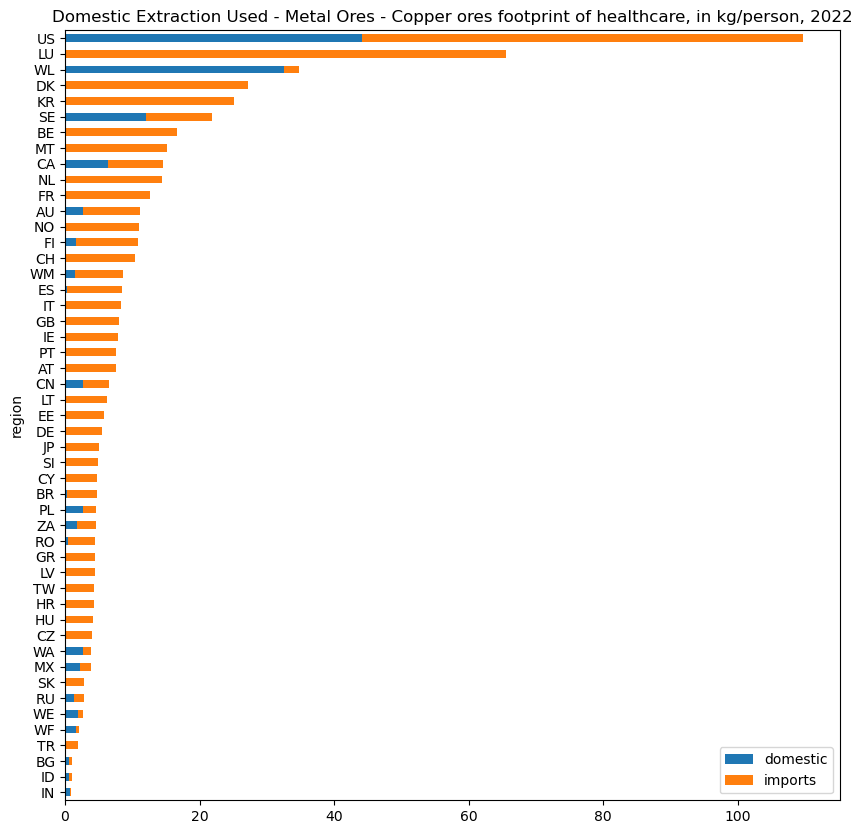

In [27]:
# Plot the results, ordered decreasingly
ax = (
    (health_ind_dom_imp_cap * scale)
    .loc[health_ind_cap.sort_values().index]
    .plot.barh(stacked=True, figsize=(10, 10), edgecolor="None")
)
ax.set_title(f"{indicator} footprint of healthcare, in kg/person, 2022")

In [28]:
exiobase_2022.material.unit.loc[indicator]

unit    kt
Name: Domestic Extraction Used - Metal Ores - Copper ores, dtype: object

In [29]:
exiobase_2022.material.D_cba_cap["FR"].nlargest(20)

stressor
Domestic Extraction Used - Non-Metallic Minerals - Sand gravel and crushed rock for construction     0.007874
Domestic Extraction Used - Grazed biomass                                                            0.001399
Domestic Extraction Used - Non-Metallic Minerals - Limestone                                         0.000967
Domestic Extraction Used - Fossil Fuels - Crude oil                                                  0.000835
Domestic Extraction Used - Crop residues - Straw                                                     0.000650
Domestic Extraction Used - Non-Metallic Minerals - Structural clays                                  0.000508
Domestic Extraction Used - Fossil Fuels - Natural gas                                                0.000482
Domestic Extraction Used - Primary Crops - Sugar crops                                               0.000441
Domestic Extraction Used - Forestry - Wood fuel and other extraction                                 0.000372
D

## All materials

In [30]:
# Calculate the footprint for all materials per country-sector of production
health_all_mat_disag = exiobase_2022.material.M[health_demand.index] @ health_demand
# Same, per capita
health_all_mat_disag_cap = health_all_mat_disag.div(
    exiobase_2022.population.loc["population"]
)

In [31]:
order_countries = health_all_mat_disag_cap.sum().sort_values().index
order_materials = health_all_mat_disag.sum(1).sort_values().index

In [32]:
from matplotlib import cm, colors

cmap = colors.ListedColormap(
    cm.tab20.colors + cm.tab20b.colors + cm.tab20c.colors, name="tab60"
)

Text(0.5, 0, 'Material footprint (kg/person)')

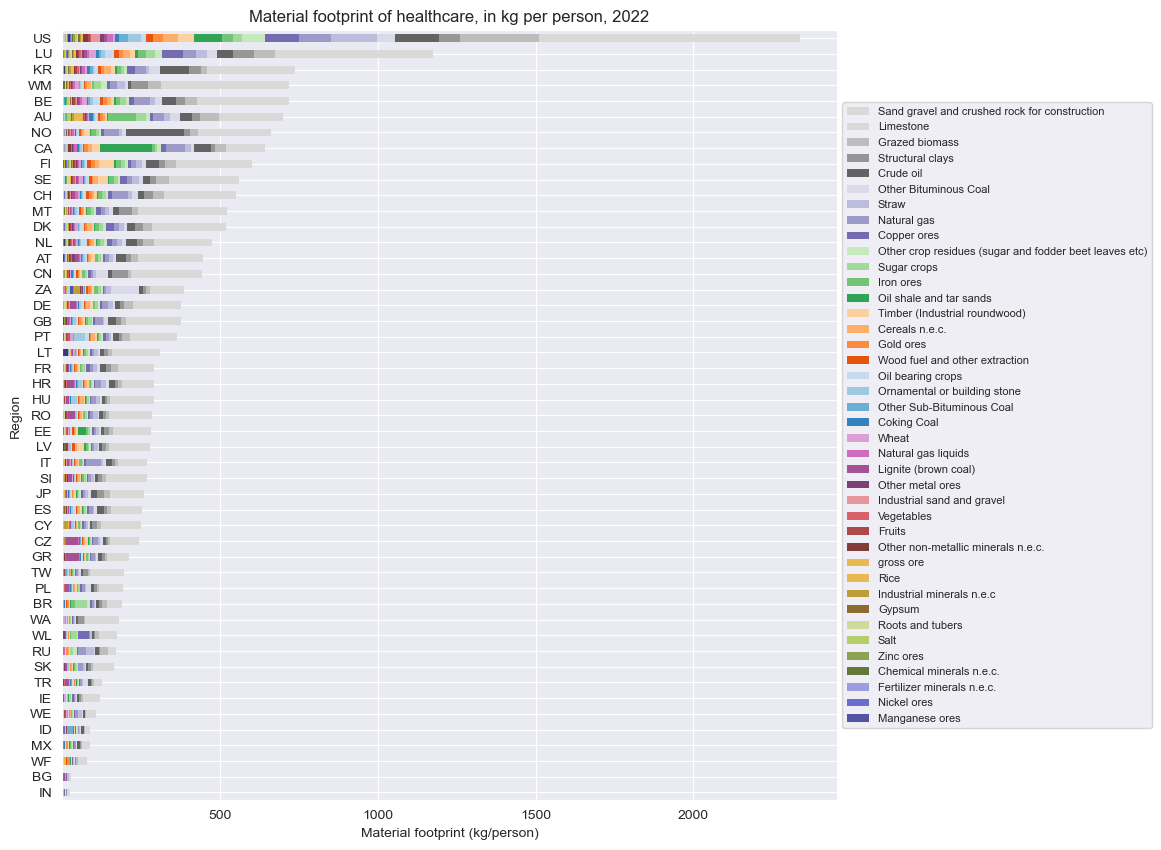

In [33]:
sns.set_style("darkgrid")

ax = (
    (health_all_mat_disag_cap * scale)
    .loc[order_materials, order_countries]
    .T.plot.barh(stacked=True, figsize=(10, 10), colormap=cmap, edgecolor="none")
)

h, l = ax.get_legend_handles_labels()
legend = [s.split(" - ")[-1] for s in l]

ax.legend(
    h[:20:-1], legend[:20:-1], loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8
)

ax.set_title("Material footprint of healthcare, in kg per person, 2022")
ax.set_ylabel("Region")
ax.set_xlabel("Material footprint (kg/person)")

## Other visualizations

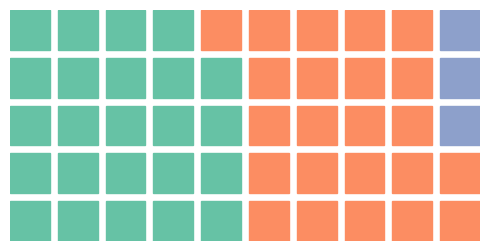

In [34]:
fig = plt.figure(
    FigureClass=Waffle, rows=5, columns=10, values=[48, 46, 6], figsize=(5, 3)
)
plt.show()

In [35]:
mat_categories = health_all_mat_disag_cap.index.str.split(" - ", expand=True)
mat_categories.names = ["Extraction", "Type", "Material", "", ""]
health_all_mat_disag_cap.index = mat_categories

In [36]:
health_mat_for_waffle = health_all_mat_disag_cap.groupby("Type").sum()
health_mat_for_waffle["US"]

Type
Crop residues            0.000217
Fishery                  0.000001
Forestry                 0.000071
Fossil Fuels             0.000457
Grazed biomass           0.000251
Metal Ores               0.000207
Non-Metallic Minerals    0.001009
Primary Crops            0.000123
Name: US, dtype: float64

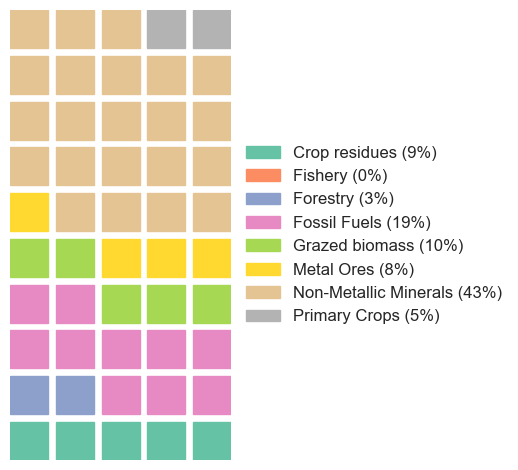

In [37]:
data = health_mat_for_waffle["US"]

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=5,
    values=data,
    vertical=True,
    labels=[f"{k} ({int(v / sum(data.values) * 100)}%)" for k, v in data.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        "loc": "center left",
        "bbox_to_anchor": (1, 0.5),
        "ncol": 1,
        "framealpha": 0,
        "fontsize": 12,
    },
)

Text(0.5, 0.01, '1 block = 10 kg')

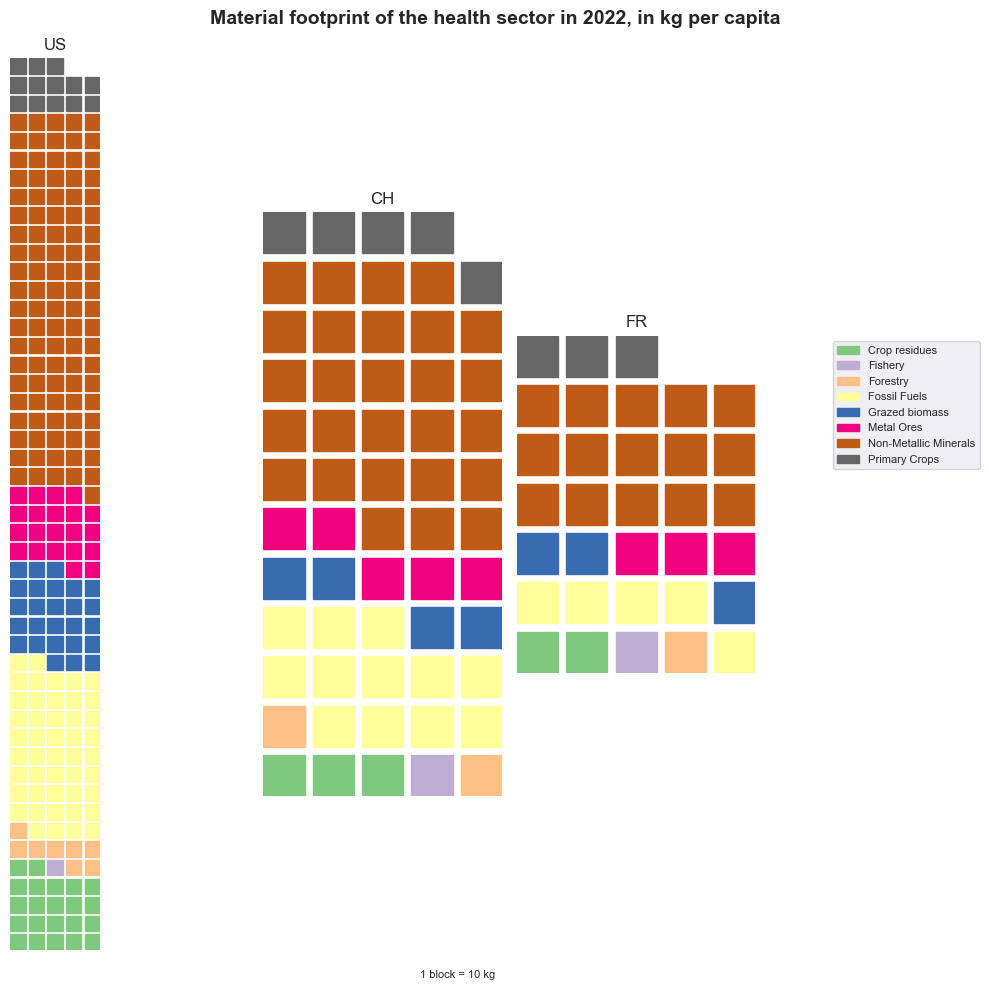

In [38]:
data = health_mat_for_waffle

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        131: {
            "values": data["US"] * 1e5,
            "vertical": True,
            # "labels": [f"{k} ({v})" for k, v in data["US"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {
                "label": "US",
                "loc": "center",
                "fontsize": 12,
            },
            # "sharey": True,
        },
        132: {
            "values": data["CH"] * 1e5,
            "vertical": True,
            # "labels": [f"{k} ({v})" for k, v in data["CH"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.2, 1), "fontsize": 8},
            "title": {
                "label": "CH",
                "loc": "center",
                "fontsize": 12,
            },
            # "sharey": True,
        },
        133: {
            "values": data["FR"] * 1e5,
            "vertical": True,
            "labels": [f"{k}" for k, v in data["FR"].items()],
            "legend": {"loc": "upper left", "bbox_to_anchor": (1.3, 1), "fontsize": 8},
            "title": {
                "label": "FR",
                "loc": "center",
                "fontsize": 12,
            },
            # "sharey": True,
        },
    },
    columns=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(10, 10),
)

fig.suptitle(
    "Material footprint of the health sector in 2022, in kg per capita",
    fontsize=14,
    fontweight="bold",
)
fig.supxlabel("1 block = 10 kg", fontsize=8, ha="right")

In [39]:
data[["US", "CH", "FR"]] * 1e5

,US,CH,FR
Type,,,
Crop residues,21.736012,2.309137,1.506432
Fishery,0.134068,0.043017,0.085870
Forestry,7.113569,1.865737,0.901165
Fossil Fuels,45.742434,11.926491,4.908283
Grazed biomass,25.135821,3.666742,2.196760
Metal Ores,20.685422,4.039774,2.625624
Non-Metallic Minerals,100.886516,26.920147,14.240356
Primary Crops,12.327240,4.348072,2.848318


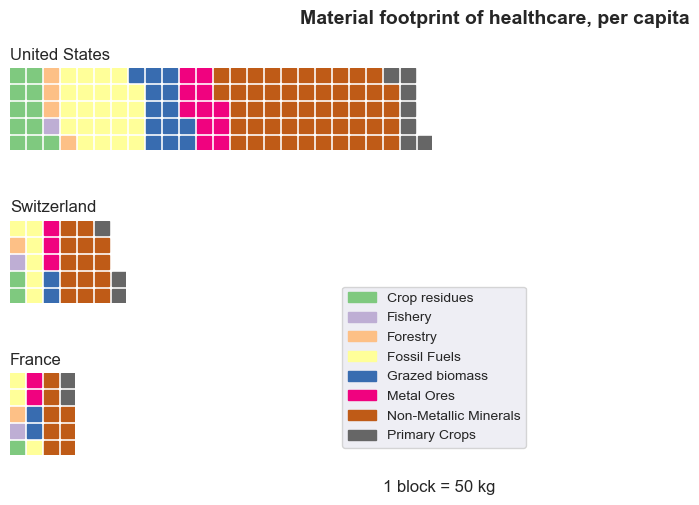

In [40]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            "values": data["US"] * 5e4,
            # "labels": [f"{k}" for k, v in data["US"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {"label": "United States", "loc": "left"},
        },
        312: {
            "values": data["CH"] * 5e4,
            # "labels": [f"{k}" for k, v in data["CH"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.2, 1), "fontsize": 8},
            "title": {"label": "Switzerland", "loc": "left"},
        },
        313: {
            "values": data["FR"] * 5e4,
            "labels": [f"{k}" for k, v in data["FR"].items()],
            "legend": {"loc": "lower left", "bbox_to_anchor": (5, 0)},
            "title": {"label": "France", "loc": "left"},
        },
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(10, 5),
)

fig.suptitle(
    "Material footprint of healthcare, per capita", fontsize=14, fontweight="bold"
)
fig.supxlabel("1 block = 50 kg", ha="right")
plt.tight_layout()

## With Andrieu data
from https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(23)00169-9/fulltext#fig4

In [41]:
health_fp_andrieu = pd.read_excel(
    "data/Andrieu_SI.xlsx", sheet_name="satellite", index_col=[0, 1], header=[0, 1]
)

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\129848724.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  health_fp_andrieu.stack("region").loc["CO2 - combustion - air"].sum().plot()


<Axes: xlabel='year'>

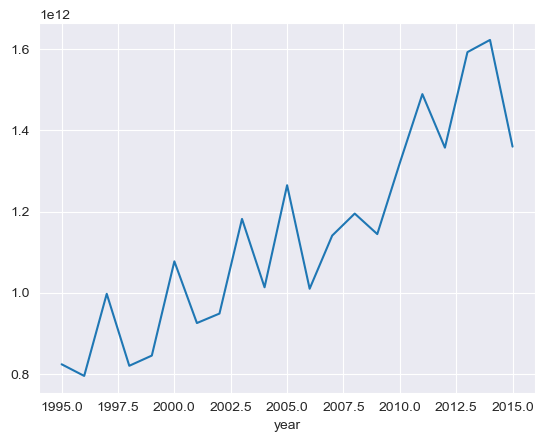

In [42]:
health_fp_andrieu.stack("region").loc["CO2 - combustion - air"].sum().plot()

In [43]:
health_fp_andrieu

year                                                             1995  \
region                                                        Austria   
Satellite                                          unit                 
As - combustion - air                              kg     2784.580850   
As - non combustion - Agglomeration plant - pel... kg       24.565019   
As - non combustion - Agglomeration plant - sin... kg       27.649649   
As - non combustion - Glass production - air       kg        0.462045   
As - non combustion - Production of coke oven c... kg       82.797150   
...                                                               ...   
Zn - non combustion - Steel production: basic o... kg    19810.384078   
Zn - non combustion - Steel production: electri... kg     7491.262373   
Zn - non combustion - Steel production: open he... kg      306.325990   
Zn - non combustion - Unrefined copper; copper ... kg       90.379990   
Zn - non combustion - Zinc, unwrought, not allo... kg       54.996047   

year                                                                   \
region                                                      Australia   
Satellite                                          unit                 
As - combustion - air                              kg    11187.270848   
As - non combustion - Agglomeration plant - pel... kg       25.253956   
As - non combustion - Agglomeration plant - sin... kg       63.878881   
As - non combustion - Glass production - air       kg        0.389118   
As - non combustion - Production of coke oven c... kg      133.897766   
...                                                               ...   
Zn - non combustion - Steel production: basic o... kg    22271.890506   
Zn - non combustion - Steel production: electri... kg    11943.515166   
Zn - non combustion - Steel production: open he... kg      435.604065   
Zn - non combustion - Unrefined copper; copper ... kg      128.749216   
Zn - non combustion - Zinc, unwrought, not allo... kg      154.362403   

year                                                                   \
region                                                        Belgium   
Satellite                                          unit                 
As - combustion - air                              kg    11060.458663   
As - non combustion - Agglomeration plant - pel... kg       34.786476   
As - non combustion - Agglomeration plant - sin... kg       39.759897   
As - non combustion - Glass production - air       kg        0.093194   
As - non combustion - Production of coke oven c... kg      170.717992   
...                                                               ...   
Zn - non combustion - Steel production: basic o... kg    31794.900853   
Zn - non combustion - Steel production: electri... kg    10925.300756   
Zn - non combustion - Steel production: open he... kg      365.280935   
Zn - non combustion - Unrefined copper; copper ... kg      186.163484   
Zn - non combustion - Zinc, unwrought, not allo... kg      177.670604   

year                                                                    \
region                                                        Bulgaria   
Satellite                                          unit                  
As - combustion - air                              kg      1125.416572   
As - non combustion - Agglomeration plant - pel... kg         7.049716   
As - non combustion - Agglomeration plant - sin... kg       110.700123   
As - non combustion - Glass production - air       kg         0.008234   
As - non combustion - Production of coke oven c... kg        36.269764   
...                                                                ...   
Zn - non combustion - Steel production: basic o... kg    251615.543119   
Zn - non combustion - Steel production: electri... kg    161471.642787   
Zn - non combustion - Steel production: open he... kg        89.853289   
Zn - non combustion - Unrefined copper; cop

In [44]:
satellite_categories = health_fp_andrieu.index.get_level_values("Satellite").str.split(
    " - ", expand=True
)

In [45]:
satellite_categories[0]

('As', 'combustion', 'air', nan, nan)

In [46]:
satellite_categories.names = ("stressor", "category", "compartment", "", "")

In [47]:
health_fp_andrieu.index = satellite_categories

In [48]:
population = pd.read_csv(
    "D:/EXIOBASE/3.9.6/exiobase_population.txt", sep="\\t", index_col=0
)

population.index.name = "year"
population.columns.name = "region"

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\3292179347.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  population = pd.read_csv(


In [49]:
regions = dict(
    zip(
        population.columns.sort_values(),
        health_fp_andrieu.columns.get_level_values("region"),
    )
)

In [50]:
population.rename(regions, axis=1, inplace=True)

In [51]:
health_fp_andrieu_cap = health_fp_andrieu.copy() / population.stack() * 1e6

In [52]:
materials = ["Metal Ores", "Non-Metallic Minerals", "Fossil Fuel: Total"]

In [53]:
data = health_fp_andrieu_cap.groupby("category").sum().loc[materials, 2015]

In [54]:
data["United States"]

category
Metal Ores                858.781608
Non-Metallic Minerals    1072.165413
Fossil Fuel: Total        326.340025
Name: United States, dtype: float64

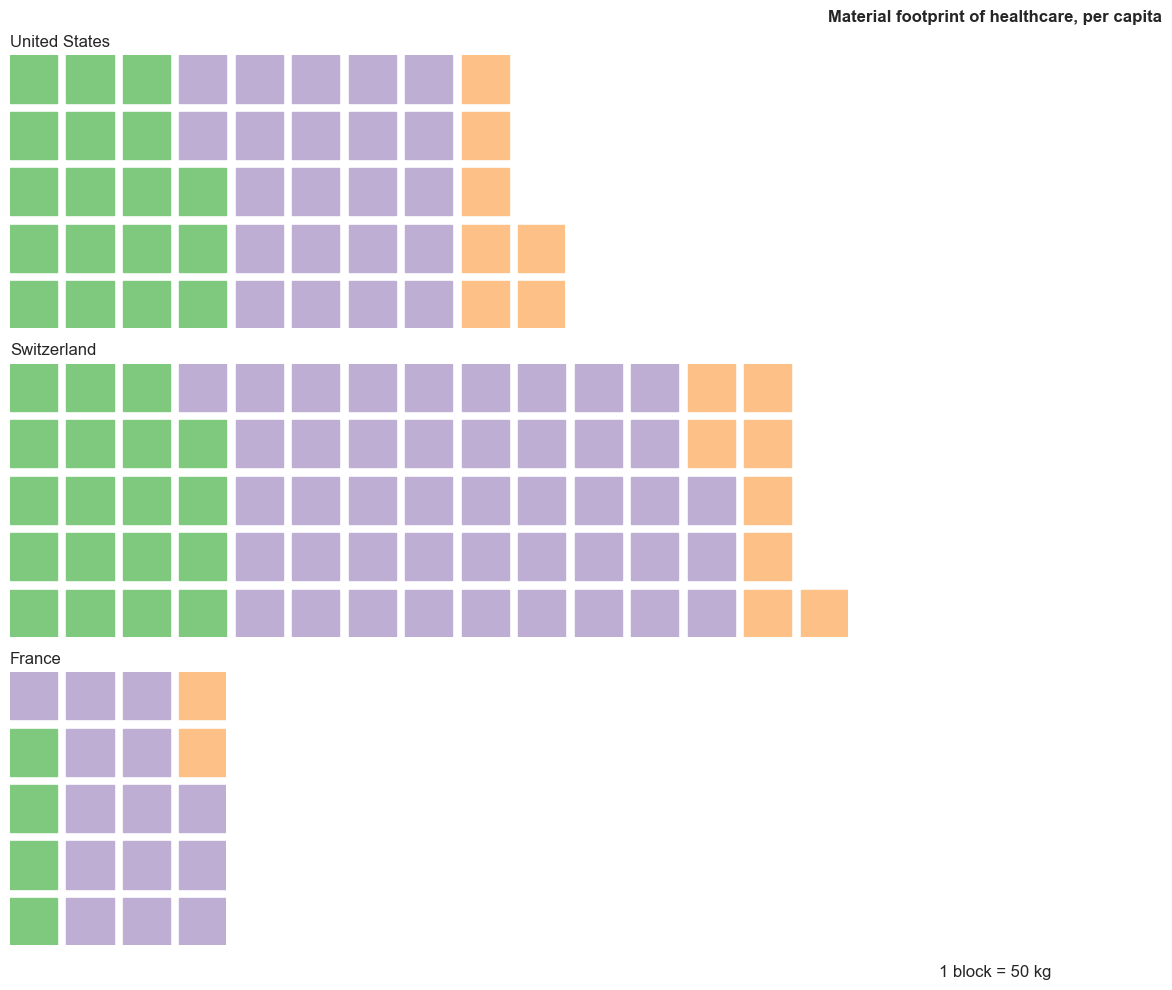

In [55]:
scale = 50


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            "values": data["United States"] / scale,
            # "labels": [f"{k}" for k, v in data["US"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {"label": "United States", "loc": "left"},
        },
        312: {
            "values": data["Switzerland"] / scale,
            # "labels": [f"{k}" for k, v in data["US"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {"label": "Switzerland", "loc": "left"},
        },
        313: {
            "values": data["France"] / scale,
            # "labels": [f"{k}" for k, v in data["US"].items()],
            # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {"label": "France", "loc": "left"},
        },
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(20, 10),
)

fig.suptitle(
    "Material footprint of healthcare, per capita", fontweight="bold", ha="center"
)
fig.supxlabel("1 block = 50 kg")
plt.tight_layout()

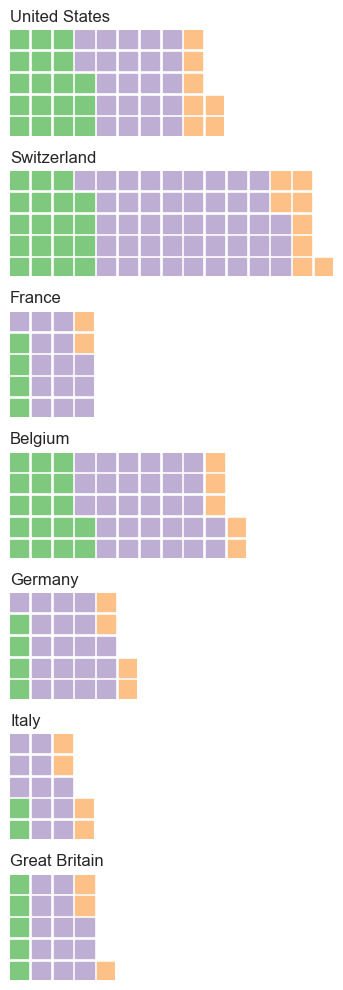

In [56]:
scale = 50
countries_to_plot = [
    "United States",
    "Switzerland",
    "France",
    "Belgium",
    "Germany",
    "Italy",
    "Great Britain",
]
n = len(countries_to_plot)

plots = {
    int(str(n) + "1" + str(i + 1)): {
        "values": data[country] / scale,
        # "labels": [f"{k}" for k, v in data["US"].items()],
        # "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
        "title": {"label": country, "loc": "left"},
    }
    for i, country in enumerate(countries_to_plot)
}

fig = plt.figure(
    FigureClass=Waffle,
    plots=plots,
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(20, 10),
)

# fig.suptitle(
#     "Material footprint of healthcare, per capita", fontweight="bold", ha="center"
# )
# fig.supxlabel("1 block = 50 kg")
plt.tight_layout()

In [57]:
health_fp_andrieu_cap.xs("Fossil Fuels", level=1)[2015]

region                                                      Australia  \
stressor                   compartment                                  
Unused Domestic Extraction Anthracite            NaN NaN     7.708723   
                           Coking coal           NaN NaN  2929.490133   
                           Crude oil             NaN NaN    12.041750   
                           Lignite/brown coal    NaN NaN   239.129425   
                           Natural gas           NaN NaN     1.946744   
                           Natural gas liquids   NaN NaN     0.000000   
                           Other bituminous coal NaN NaN  1034.832345   
                           Peat                  NaN NaN     0.000000   
                           Sub-bituminous coal   NaN NaN   210.168366   

region                                                       Austria  \
stressor                   compartment                                 
Unused Domestic Extraction Anthracite            NaN NaN    3.253711   
                           Coking coal           NaN NaN   37.426756   
                           Crude oil             NaN NaN    6.134232   
                           Lignite/brown coal    NaN NaN  289.366278   
                           Natural gas           NaN NaN    0.770481   
                           Natural gas liquids   NaN NaN    0.000000   
                           Other bituminous coal NaN NaN  117.040289   
                           Peat                  NaN NaN    0.000000   
                           Sub-bituminous coal   NaN NaN   13.837254   

region                                                       Belgium  \
stressor                   compartment                                 
Unused Domestic Extraction Anthracite            NaN NaN   21.658308   
                           Coking coal           NaN NaN  132.603390   
                           Crude oil             NaN NaN   13.942586   
                           Lignite/brown coal    NaN NaN  283.066674   
                           Natural gas           NaN NaN    1.331957   
                           Natural gas liquids   NaN NaN    0.000000   
                           Other bituminous coal NaN NaN  286.716049   
                           Peat                  NaN NaN    0.000000   
                           Sub-bituminous coal   NaN NaN  101.542786   

region                                                       Brazil  \
stressor                   compartment                                
Unused Domestic Extraction Anthracite            NaN NaN   0.342523   
                           Coking coal           NaN NaN   5.957004   
                           Crude oil             NaN NaN   1.998707   
                           Lignite/brown coal    NaN NaN   3.522010   
                           Natural gas           NaN NaN   0.853459   
                           Natural gas liquids   NaN NaN   0.000000   
                           Other bituminous coal NaN NaN  24.255092   
                           Peat                  NaN NaN   0.000000   
                           Sub-bituminous coal   NaN NaN   4.593041   

region                                                      Bulgaria  \
stressor                   compartment                                 
Unused Domestic Extraction Anthracite            NaN NaN    2.843088   
                           Coking coal           NaN NaN   11.771988   
                           Crude oil             NaN NaN    1.727988   
                           Lignite/brown coal    NaN NaN  381.738120   
                           Natural gas           NaN NaN    3.096948   
                           Natural gas liquids   NaN NaN    0.000000   
                           Other bituminous coal NaN NaN   64.437767   
                           Peat                  NaN NaN    0.000000   
                           Sub-bituminous coal   NaN NaN    3.381255   

region                             

# Education footprints

In [58]:
Z_educ = exiobase_2022.Z.xs("Education (80)", level="sector", axis=1)
Z_educ.head()

region                                                   AT        BE  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    7.964639e-08  0.001022   
       Cultivation of cereal grains nec        2.403514e-01  0.000713   
       Cultivation of vegetables, fruit, nuts  8.129175e-01  0.000090   
       Cultivation of oil seeds                1.223187e+00  0.002130   

region                                               BG   CY        CZ  \
region sector                                                            
AT     Cultivation of paddy rice               0.000000  0.0  0.000000   
       Cultivation of wheat                    0.083485  0.0  0.000208   
       Cultivation of cereal grains nec        0.833322  0.0  0.002638   
       Cultivation of vegetables, fruit, nuts  0.101642  0.0  0.000782   
       Cultivation of oil seeds                0.068748  0.0  0.000956   

region                                               DE        DK  \
region sector                                                       
AT     Cultivation of paddy rice               0.000000  0.000000   
       Cultivation of wheat                    0.326705  0.000102   
       Cultivation of cereal grains nec        0.943482  0.001318   
       Cultivation of vegetables, fruit, nuts  0.176565  0.003514   
       Cultivation of oil seeds                0.449333  0.002228   

region                                                   EE        ES  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    4.556628e-05  0.000553   
       Cultivation of cereal grains nec        1.708057e-03  0.003063   
       Cultivation of vegetables, fruit, nuts  7.307500e-04  0.000455   
       Cultivation of oil seeds                3.891061e-09  0.001080   

region                                                   FI  ...  \
region sector                                                ...   
AT     Cultivation of paddy rice               0.000000e+00  ...   
       Cultivation of wheat                    4.632184e-09  ...   
       Cultivation of cereal grains nec        7.870889e-09  ...   
       Cultivation of vegetables, fruit, nuts  2.219603e-02  ...   
       Cultivation of oil seeds                4.904351e-03  ...   

region                                                   TR   TW  \
region sector                                                      
AT     Cultivation of paddy rice               0.000000e+00  0.0   
       Cultivation of wheat                    1.053060e-09  0.0   
       Cultivation of cereal grains nec        1.702742e-09  0.0   
       Cultivation of vegetables, fruit, nuts  2.014975e-04  0.0   
       Cultivation of oil seeds                5.710765e-05  0.0   

region                                                   NO            ID  \
region sector                                                               
AT     Cultivation of paddy rice               0.000000e+00  0.000000e+00   
       Cultivation of wheat                    1.579873e-09  2.055114e-09   
       Cultivation of cereal grains nec        2.693261e-09  3.504276e-09   
       Cultivation of vegetables, fruit, nuts  3.556308e-03  2.346654e-08   
       Cultivation of oil seeds                4.283838e-03  2.604322e-09   

region                                                   ZA        WA  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    7.601811e-09  0.001706   
       Cultivation of cereal grains nec        1.296420e-08  0.000011   
       Cultivation of vegetables, fruit, nuts  8.001310e-05  0.000150   
       Cultivation of oil seeds          

## Isolate the education sectors in footprints

In [75]:
educ_air_emissions = exiobase_2022.air_emissions.D_cba.xs(
    "Education (80)", level="sector", axis=1
)

educ_air_emissions_cap = exiobase_2022.air_emissions.D_cba.xs(
    "Education (80)", level="sector", axis=1
).div(exiobase_2022.population.loc["population"], axis=1)

In [76]:
exiobase_2022.material.D_cba.loc["Domestic Extraction Used - Metal Ores - Iron ores"]

region  sector                                             
AT      Cultivation of paddy rice                                 0.004272
        Cultivation of wheat                                      1.160892
        Cultivation of cereal grains nec                          1.242218
        Cultivation of vegetables, fruit, nuts                   14.760925
        Cultivation of oil seeds                                  5.379477
                                                                  ...     
WM      Activities of membership organisation n.e.c. (91)       397.579258
        Recreational, cultural and sporting activities (92)    1472.717429
        Other service activities (93)                           967.763282
        Private households with employed persons (95)            84.350594
        Extra-territorial organizations and bodies                0.000000
Name: Domestic Extraction Used - Metal Ores - Iron ores, Length: 7987, dtype: float64

In [77]:
exiobase_2022.air_emissions.D_cba.loc["CO2 - combustion - air"].xs(
    "Education (80)", level="sector"
)

region
AT    6.095196e+09
BE    1.207622e+09
BG    3.135053e+09
CY    1.181110e+08
CZ    1.563808e+09
DE    6.145179e+09
DK    1.154781e+09
EE    2.266944e+08
ES    2.594370e+09
FI    1.212149e+09
FR    4.628986e+09
GR    1.054411e+09
HR    3.994447e+08
HU    8.442337e+08
IE    3.654192e+08
IT    3.899883e+09
LT    2.331055e+08
LU    1.455670e+08
LV    2.274225e+08
MT    2.804477e+08
NL    2.211857e+09
PL    4.247164e+09
PT    5.183286e+08
RO    7.793713e+08
SE    2.172191e+09
SI    3.330624e+08
SK    4.273206e+08
GB    8.241974e+09
US    2.970366e+11
JP    1.897632e+10
CN    1.957975e+11
CA    1.795377e+10
KR    1.959236e+10
BR    6.511894e+09
IN    3.407889e+10
MX    3.929962e+09
RU    2.502818e+10
AU    2.207755e+10
CH    1.200234e+09
TR    4.435487e+09
TW    3.413742e+09
NO    6.715209e+08
ID    1.641097e+10
ZA    2.048280e+10
WA    3.091484e+10
WL    1.573277e+10
WE    2.805847e+09
WF    3.801448e+10
WM    4.824821e+10
Name: CO2 - combustion - air, dtype: float64

In [78]:
exiobase_2022.air_emissions.D_cba_reg

region,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
stressor,,,,,,,,,,,,,,,,,,,,,
As - combustion - air,2.949061e+05,5.197503e+05,1.043210e+05,29087.394721,1.774957e+05,4.502752e+06,1.434974e+06,4.466508e+04,7.245477e+05,4.658679e+05,...,1.013019e+06,1.510244e+06,1.698575e+06,9.566689e+05,2.912339e+05,4.240383e+06,1.682078e+06,4.638586e+05,9.525671e+05,2.694822e+06
B(a)P - combustion - air,2.723851e+04,4.059426e+04,1.046840e+04,2280.174895,3.637387e+04,3.736110e+05,2.085733e+04,7.773209e+03,1.301823e+05,2.279654e+04,...,2.210638e+05,2.327264e+04,2.975831e+04,1.537950e+05,2.178451e+05,2.607129e+06,6.877985e+05,1.922514e+05,5.140414e+06,6.120411e+05
B(b)F - combustion - air,4.135534e+04,6.160929e+04,1.378902e+04,3340.244526,5.266226e+04,5.719107e+05,2.903068e+04,1.089586e+04,2.037359e+05,3.410196e+04,...,3.456986e+05,3.433874e+04,4.077590e+04,1.957421e+05,3.009828e+05,3.378246e+06,8.824341e+05,2.794055e+05,5.590561e+06,9.635576e+05
B(k)F - combustion - air,2.508737e+03,3.716874e+03,3.754066e+03,201.281368,7.950124e+03,1.993169e+04,4.368386e+03,1.795852e+03,7.248741e+03,2.745847e+03,...,3.782189e+04,5.409440e+03,6.490049e+03,6.242041e+04,1.003068e+05,1.056324e+06,2.419840e+05,4.302129e+04,2.982990e+06,5.438787e+04
CH4 - combustion - air,2.869788e+07,1.947338e+07,1.670149e+07,774776.954982,4.215709e+07,1.707580e+08,1.639636e+07,5.915403e+06,4.789288e+07,2.385551e+07,...,7.446450e+07,1.608677e+07,1.155759e+07,2.260960e+08,8.285255e+07,1.353401e+09,3.605829e+08,7.908080e+07,3.858281e+09,1.938541e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CO2 - waste - fossil - air,7.424305e+05,1.748252e+06,3.205069e+05,181776.452609,2.443893e+06,7.400659e+06,9.902171e+05,2.104545e+05,4.873867e+07,6.158302e+05,...,1.177691e+06,2.320408e+07,5.989118e+05,8.561656e+05,4.417100e+05,1.290927e+07,8.699545e+06,9.535593e+05,2.675886e+06,5.667115e+06
NH3 - waste - air,4.316407e+00,6.904789e+00,5.859605e-01,0.144435,7.777465e+01,3.383547e+01,2.365689e+00,1.495521e+00,9.631104e+01,1.197892e+01,...,4.356656e+00,6.206004e+00,1.776577e+01,2.217524e+00,1.212000e+00,1.659898e+01,1.282678e+01,4.873131e+00,6.591587e+00,1.570594e+01
NOX - waste - air,9.720039e+04,2.457895e+05,1.239318e+04,4548.451729,3.845286e+05,1.037997e+06,1.023032e+06,4.903859e+04,1.753915e+06,1.688219e+05,...,1.240039e+05,1.007423e+05,1.982343e+05,4.407490e+04,2.650036e+04,4.051189e+05,2.801508e+05,1.069969e+05,2.308719e+05,3.973210e+05


In [79]:
# GWP (PRG = pouvoir de réchauffement global)
# Facteurs des gaz à effet de serre
# CO2 = 1, CH4 = 28, N2O = 273
gwp = pd.read_csv("exiobase/gwp.csv", encoding="utf-8", index_col=0)["GWP100"]
gwp

stressor
As - combustion - air         0.0
B(a)P - combustion - air      0.0
B(b)F - combustion - air      0.0
B(k)F - combustion - air      0.0
CH4 - combustion - air        0.0
                             ... 
CO2 - waste - fossil - air    1.0
NH3 - waste - air             0.0
NOX - waste - air             0.0
PM2.5 - waste - air           0.0
SOx - waste - air             0.0
Name: GWP100, Length: 418, dtype: float64

In [80]:
educ_ghg_cap = gwp @ educ_air_emissions_cap

<Axes: ylabel='region'>

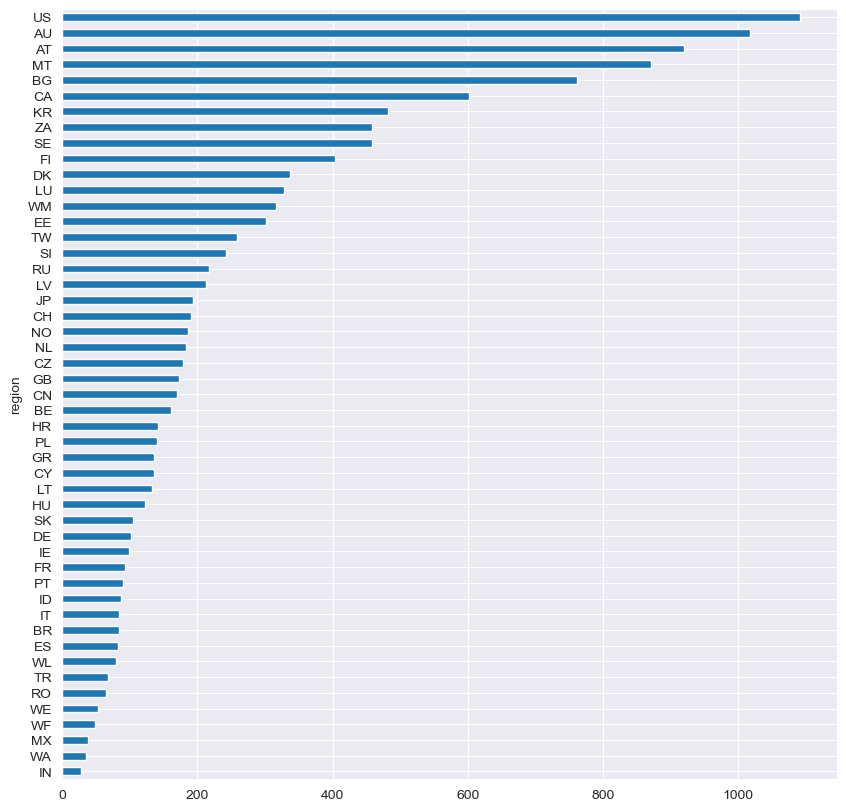

In [81]:
sns.set_style()

fig, ax = plt.subplots(figsize=(10, 10))
educ_ghg_cap.sort_values().plot.barh(ax=ax)

In [82]:
# We can also create the demand vector for the education sector only
educ_demand = (
    exiobase_2022.Y.xs("Education (80)", level="sector", drop_level=False)
    .groupby("region", axis=1)
    .sum()
)
educ_demand.head()

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\2596044206.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby("region", axis=1)


,region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SK,TR,TW,US,WA,WE,WF,WL,WM,ZA
region,sector,,,,,,,,,,,,,,,,,,,,,
AT,Education (80),101391.799028,2.477158,5.073943,0.979539,4.507762,4.409756,3.884513,3.807339,8.195608e-01,3.499253,...,3.391813,3.204857,13.530806,4.614873,0.378800,4.507764,4.439989,5.660236,7.875603,2.921045
BE,Education (80),4.462371,3.833100,34331.407442,2.285811,6.546365,5.900690,2.903506,6.311862,1.348699e+00,4.738391,...,4.105056,4.791825,16.588460,19.465970,1.370882,4.645786,79.922300,24.732078,39.910921,3.917960
BG,Education (80),19.334048,5.275431,21.828003,23744.444233,9.126701,11.936460,3.276311,3.677702,2.240388e-01,24.667755,...,16.632382,48.083861,30.743743,23.905327,3.168559,35.322576,8.217618,13.362145,62.817959,4.829639
CY,Education (80),0.636130,0.633193,0.999670,0.288165,1.079915,1.106423,0.538109,1.551145,1.182936e+03,0.872910,...,0.782117,1.066386,3.553933,0.873365,0.078293,0.752590,1.072788,1.483061,1.666880,0.840870
CZ,Education (80),1.506929,0.731599,1.501575,0.202294,1.313478,1.491888,0.466583,1.609248,2.784039e-07,10264.523012,...,2.850502,1.135798,5.280665,2.645383,0.325820,0.952673,0.919134,1.901197,2.721450,0.531887


In [86]:
# It would be interesting to compare against expenses
educ_expenses_cap = (
    educ_demand.sum().div(exiobase_2022.population.loc["population"]) * 1e6
)
educ_expenses_cap

AT    11248.564674
AU     4525.548669
BE     3039.762789
BG     3501.462505
BR      460.162381
CA     3333.365268
CH      552.171786
CN      484.591835
CY     1255.455594
CZ     1014.881884
DE     2203.924141
DK     3862.828880
EE      740.774082
ES     1614.747415
FI     1729.937544
FR      846.087539
GB     2621.884163
GR     2160.976910
HR      965.816430
HU      905.117791
ID      184.044378
IE      711.870049
IN       95.241934
IT     1381.196402
JP     2439.018195
KR     1871.494267
LT      847.976053
LU     3232.266016
LV     1273.081027
MT     5105.784373
MX      432.769081
NL     2456.887381
NO     4063.791309
PL      799.752052
PT     1564.219835
RO      489.509228
RU      469.999897
SE     3142.757824
SI     1667.141666
SK      800.249289
TR      678.097615
TW      931.219327
US     6388.859990
WA      120.585239
WE      250.252694
WF       50.788823
WL      356.091229
WM      788.797200
ZA      339.062549
dtype: float64

C:\Users\Gibon\AppData\Local\Temp\ipykernel_27600\3088457679.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))


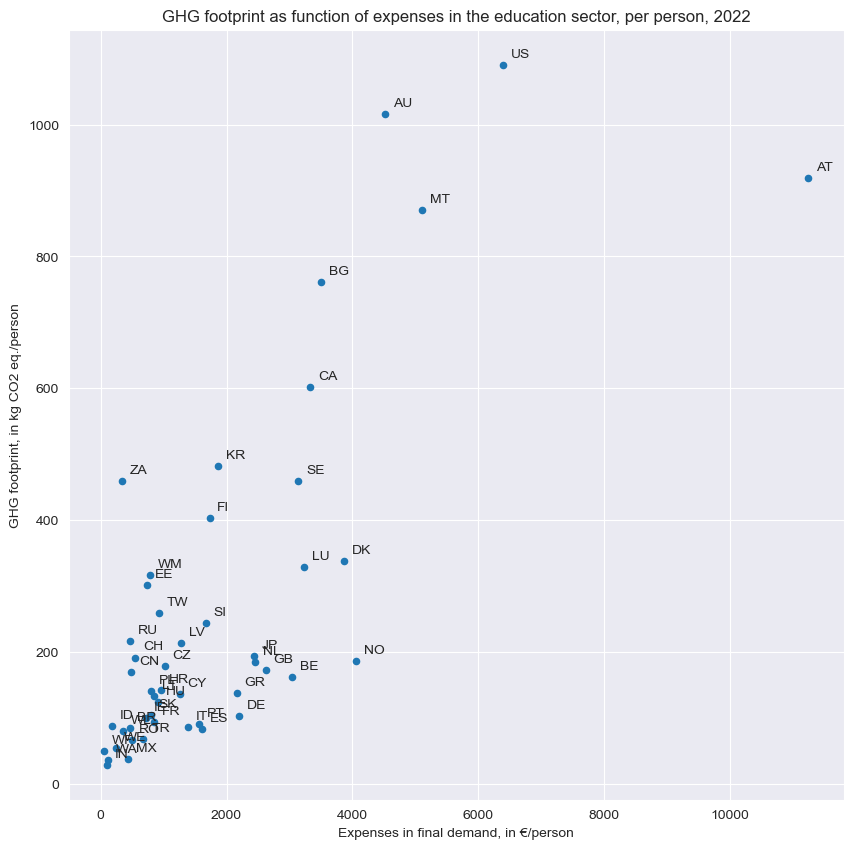

In [84]:
# Scatter plot, footprint vs. expenses
sns.set_style()

GHG_EUR = pd.concat(
    [educ_expenses_cap, educ_ghg_cap],
    keys=["Expenses (€)", "GHG footprint (kg CO2 eq.)"],
    axis=1,
)

fig, ax = plt.subplots(figsize=(10, 10))
GHG_EUR.plot.scatter(x="Expenses (€)", y="GHG footprint (kg CO2 eq.)", ax=ax)
ax.set_title(
    "GHG footprint as function of expenses in the education sector, per person, 2022"
)
ax.set_ylabel("GHG footprint, in kg CO2 eq./person")
ax.set_xlabel("Expenses in final demand, in €/person")

ylim = ax.get_ylim()
offset_y = (ylim[1] - ylim[0]) / 100
xlim = ax.get_xlim()
offset_x = (xlim[1] - xlim[0]) / 100

for row in GHG_EUR.iterrows():
    ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))

In [104]:
exiobase_2022.material.D_cba.loc[
    "Domestic Extraction Used - Fossil Fuels - Crude oil"
].xs("Education (80)", level="sector").div(
    exiobase_2022.population.loc["population"]
) * 1000000

region
AT     99.049860
BE     10.776467
BG     27.949840
CY      5.050413
CZ      5.783999
DE      5.609268
DK     19.346832
EE     11.026144
ES      8.524411
FI     19.287395
FR      4.025391
GR     35.161452
HR     11.324035
HU      6.813714
IE      7.703206
IT      5.786526
LT      7.484368
LU     23.317840
LV      6.899127
MT     62.155505
NL     35.571067
PL      5.067780
PT      5.003762
RO      3.483032
SE     23.665229
SI     11.730016
SK      5.326552
GB     13.219387
US    173.368907
JP     20.353564
CN     13.850606
CA     64.675182
KR     56.444059
BR      6.259278
IN      1.194462
MX      4.160241
RU      8.974008
AU     73.097775
CH     14.968615
TR      3.534594
TW      5.431918
NO     55.871034
ID      7.830615
ZA     13.939620
WA      2.401746
WL      9.355846
WE      4.018364
WF      2.013351
WM      9.483320
dtype: float64